## Crash Injury Severity Prediction

#### About the dataset

This dataset contains crash information from the last five years to the current date.It includes details about location,road,weather,light condition,vehicles,injuries etc. The goal is to build a machine learning model to predict whether there is a severe injury due to a crash.

#### Features

Location-Related Features
* location_description : description of the crash location
* lat2 : latiitude of the location
* lon2 : longitude of the location

Vehicle-Related Features
* vehicle1,vehicle2,vehicle3,vehicle4,vehicle5 : type of the vehicle get crashed
* numpassengers : number of passengers in vehicle

Road & Traffic Conditions
* rdfeatures : features of the road where crash occured   
* rdcharacter : character of the road   
* rdclass : class of the road    
* rdsurface :  type of road surface    
* rdcondition : condition of road      
* rdconfigur : configuration of road     
* trafcontrl : type of traffic control present
* numpedestrians : number of pedestrians
* workarea : type of work area

Weather & Light Conditions
* weather : weather at the time of crash
* lightcond : light condition at the time of crash

Time & Date-Related Features
* month : month when crash occured
* year : year when crash occured
* crash_date : date when crash occured

Injury Related Features
* injuries : whether there is a injury due to crash(yes/no)
* possblinj : number of possible injuries

#### Importing the necessary libraries

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier,BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score,accuracy_score,f1_score,recall_score,confusion_matrix,precision_recall_curve,precision_score
from imblearn.combine import SMOTEENN

import warnings
warnings.filterwarnings('ignore')

#### Loading the dataset

In [14]:
crash_df = pd.read_csv("cpd-crash-incidents.csv",sep=";")

In [15]:
crash_df.head()

,tamainid,location_description,rdfeature,rdcharacter,rdclass,rdconfigur,rdsurface,rdcondition,lightcond,weather,...,ta_date,ta_time,crash_date,geo_location,year,fatalities,injuries,month,contributing_factor,vehicle_type
0,43770,20 FEET FROM SR 1615 (HIGH HOUSE RD),NO SPECIAL FEATURE,"STRAIGHT,LEVEL",STATE SECONDARY ROUTE,"TWO-WAY,DIVIDED,UNPROTECTED MEDIAN",SMOOTH ASPHALT,DRY,DAYLIGHT,CLEAR,...,2020-02-10,9:47:14 AM,2020-02-10T14:47:14+00:00,NaN,2020,No,No,2,"NONE,NONE","SPORT UTILITY,PASSENGER CAR"
1,43771,37 FEET FROM PVA 1387 SE MAYNARD RD,NO SPECIAL FEATURE,"STRAIGHT,LEVEL",PUBLIC VEHICULAR AREA,"TWO-WAY,NOT DIVIDED",COARSE ASPHALT,DRY,DAYLIGHT,CLEAR,...,2020-02-10,1:02:13 PM,2020-02-10T18:02:13+00:00,NaN,2020,No,No,2,"NONE,NONE","PASSENGER CAR,PASSENGER CAR"
2,43773,NEAR .25 MILES E OF E NC 540 HWY,NO SPECIAL FEATURE,"STRAIGHT,LEVEL",NC ROUTE,"TWO-WAY,DIVIDED,POSITIVE MEDIAN BARRIER",GROOVED CONCRETE,DRY,DAYLIGHT,CLEAR,...,2020-02-10,7:45:59 AM,2020-02-10T12:45:59+00:00,NaN,2020,No,No,2,"NONE,NONE","PICKUP,VAN"
3,43774,200 FEET FROM NC 55 HWY,NO SPECIAL FEATURE,"STRAIGHT,LEVEL",NC ROUTE,"TWO-WAY,DIVIDED,UNPROTECTED MEDIAN",SMOOTH ASPHALT,DRY,DAYLIGHT,CLEAR,...,2020-02-10,1:50:24 PM,2020-02-10T18:50:24+00:00,"35.845812358, -78.89077863",2020,No,No,2,"NONE,NONE","PASSENGER CAR,SPORT UTILITY"
4,43780,431 FEET FROM SR 1300 (KILDAIRE FARM RD),FOUR-WAY INTERSECTION,"STRAIGHT,LEVEL",STATE SECONDARY ROUTE,"TWO-WAY,DIVIDED,UNPROTECTED MEDIAN",COARSE ASPHALT,DRY,DARK - LIGHTED ROADWAY,CLEAR,...,2020-02-09,6:39:57 PM,2020-02-09T23:39:57+00:00,NaN,2020,No,No,2,"NONE,NONE","SPORT UTILITY,VAN"


#### Analysing the dataset

In [17]:
print("shape of dataset : ",crash_df.shape)

shape of dataset :  (20724, 42)


The dataset have 20724 rows and 42 columns

In [19]:
#display column names
crash_df.columns

Index(['tamainid', 'location_description', 'rdfeature', 'rdcharacter',
       'rdclass', 'rdconfigur', 'rdsurface', 'rdcondition', 'lightcond',
       'weather', 'trafcontrl', 'lat', 'lon', 'lon2', 'lat2', 'tract', 'zone',
       'fatality', 'possblinj', 'numpassengers', 'numpedestrians',
       'contrcir1_desc', 'contrcir2_desc', 'contrcir3_desc', 'contrcir4_desc',
       'vehicle1', 'vehicle2', 'vehicle3', 'vehicle4', 'vehicle5', 'workarea',
       'records', 'ta_date', 'ta_time', 'crash_date', 'geo_location', 'year',
       'fatalities', 'injuries', 'month', 'contributing_factor',
       'vehicle_type'],
      dtype='object')

In [20]:
crash_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20724 entries, 0 to 20723
Data columns (total 42 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tamainid              20724 non-null  int64  
 1   location_description  20719 non-null  object 
 2   rdfeature             20212 non-null  object 
 3   rdcharacter           20219 non-null  object 
 4   rdclass               20222 non-null  object 
 5   rdconfigur            20150 non-null  object 
 6   rdsurface             20233 non-null  object 
 7   rdcondition           20233 non-null  object 
 8   lightcond             20249 non-null  object 
 9   weather               20247 non-null  object 
 10  trafcontrl            20198 non-null  object 
 11  lat                   8888 non-null   float64
 12  lon                   8888 non-null   float64
 13  lon2                  20220 non-null  float64
 14  lat2                  20199 non-null  float64
 15  tract              

In [21]:
#check data types
crash_df.dtypes

tamainid                  int64
location_description     object
rdfeature                object
rdcharacter              object
rdclass                  object
rdconfigur               object
rdsurface                object
rdcondition              object
lightcond                object
weather                  object
trafcontrl               object
lat                     float64
lon                     float64
lon2                    float64
lat2                    float64
tract                    object
zone                     object
fatality                  int64
possblinj                 int64
numpassengers           float64
numpedestrians          float64
contrcir1_desc           object
contrcir2_desc           object
contrcir3_desc           object
contrcir4_desc           object
vehicle1                 object
vehicle2                 object
vehicle3                 object
vehicle4                 object
vehicle5                 object
workarea                 object
records 

In [22]:
#statistical analysis of data
crash_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
tamainid,20724.0,54090.961687,6.420033e+03,4.324900e+04,48460.750000,53643.500000,59824.250000,6.501000e+04
lat,8888.0,35.778530,4.575991e-02,3.555265e+01,35.754908,35.775377,35.798769,3.600833e+01
lon,8888.0,-78.795930,6.588438e-02,-7.922919e+01,-78.825002,-78.783583,-78.763748,-7.829417e+01
lon2,20220.0,-18517.614056,1.117817e+06,-7.887380e+07,-78.819509,-78.783167,-78.763500,7.897055e+01
lat2,20199.0,3757.838057,3.571278e+05,-7.885800e+01,35.753647,35.772740,35.796926,3.581378e+07
fatality,20724.0,0.001544,4.047598e-02,0.000000e+00,0.000000,0.000000,0.000000,2.000000e+00
possblinj,20724.0,0.183604,5.452275e-01,0.000000e+00,0.000000,0.000000,0.000000,1.400000e+01
numpassengers,6319.0,1.773540,2.289955e+00,1.000000e+00,1.000000,1.000000,2.000000,6.300000e+01
numpedestrians,129.0,1.031008,1.740144e-01,1.000000e+00,1.000000,1.000000,1.000000,2.000000e+00
records,20724.0,10362.500000,5.982648e+03,1.000000e+00,5181.750000,10362.500000,15543.250000,2.072400e+04


### Data Preprocessing

#### Data Cleaning

##### identifying and filling missing values

In [26]:
crash_df.isnull().sum()

tamainid                    0
location_description        5
rdfeature                 512
rdcharacter               505
rdclass                   502
rdconfigur                574
rdsurface                 491
rdcondition               491
lightcond                 475
weather                   477
trafcontrl                526
lat                     11836
lon                     11836
lon2                      504
lat2                      525
tract                   15343
zone                    11644
fatality                    0
possblinj                   0
numpassengers           14405
numpedestrians          20595
contrcir1_desc           3060
contrcir2_desc          20696
contrcir3_desc            565
contrcir4_desc          20662
vehicle1                  609
vehicle2                 3615
vehicle3                19726
vehicle4                20579
vehicle5                20697
workarea                  476
records                     0
ta_date                     0
ta_time   

##### Drop unnecessary columns 

In [28]:
#drop the columns that are not neccessary for prediction
unnecessary_columns = ['tamainid','geo_location','fatality','lon','lat','fatalities']
crash_df = crash_df.drop(columns=[col for col in unnecessary_columns if col in crash_df.columns])

In [29]:
#finding number of vehicles involved in each crash before imputation as nan field indicate there is no vehicle involved in crash
def count_vehicles(row):
    vehicle_columns = ['vehicle1', 'vehicle2', 'vehicle3', 'vehicle4', 'vehicle5']
    count = 0
    for col in vehicle_columns:
        if pd.notna(row[col]): # Check for NaN (missing values)
            count += 1
    return count

crash_df['number_of_vehicles'] = crash_df.apply(count_vehicles, axis=1)

In [30]:
crash_df['number_of_vehicles'].value_counts()

number_of_vehicles
2    16011
1     3210
3      853
0      506
4      117
5       27
Name: count, dtype: int64

In [31]:
#drop vehicle related columns as it is not needed
vehicle_columns = ['vehicle1', 'vehicle2', 'vehicle3', 'vehicle4', 'vehicle5']
crash_df.drop(vehicle_columns,axis=1,inplace=True)

In [32]:
#as we are going to predict severity of injury extract severity based on possible injuries
crash_df["Injury_Severity"] = crash_df["possblinj"].apply(lambda x: "Not Severe" if 0 <= x <= 1 else "Severe")
crash_df.drop('possblinj',axis=1,inplace=True)

In [33]:
#identify numerical and categorical features
num_features = crash_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_features = crash_df.select_dtypes(include=['object']).columns.tolist()

In [34]:
# For numerical features, fill missing values with the mean
for feature in num_features:
    crash_df[feature].fillna(crash_df[feature].median(), inplace=True)

# For categorical features, fill missing values with unknown
for feature in cat_features:
    crash_df[feature].fillna("UNKNOWN", inplace=True)

In [35]:
crash_df.isnull().sum()

location_description    0
rdfeature               0
rdcharacter             0
rdclass                 0
rdconfigur              0
rdsurface               0
rdcondition             0
lightcond               0
weather                 0
trafcontrl              0
lon2                    0
lat2                    0
tract                   0
zone                    0
numpassengers           0
numpedestrians          0
contrcir1_desc          0
contrcir2_desc          0
contrcir3_desc          0
contrcir4_desc          0
workarea                0
records                 0
ta_date                 0
ta_time                 0
crash_date              0
year                    0
injuries                0
month                   0
contributing_factor     0
vehicle_type            0
number_of_vehicles      0
Injury_Severity         0
dtype: int64

##### Unique values of categorical column

In [37]:
for feature in cat_features:
    print(f"unique values of {feature} : ")
    print("------------------------------------")
    print(crash_df[feature].unique())
    print("\n")

unique values of location_description : 
------------------------------------
['20 FEET FROM SR 1615 (HIGH HOUSE RD)'
 '37 FEET FROM PVA 1387 SE MAYNARD RD' 'NEAR .25 MILES E OF E NC 540 HWY'
 ... '1.7 MILES FROM US 1 NB' '.1 MILES FROM P.V.A. OF 81 MCKENAN DR'
 '.25 MILES FROM PVA 201 SOCCER PARK DR']


unique values of rdfeature : 
------------------------------------
['NO SPECIAL FEATURE' 'FOUR-WAY INTERSECTION' 'DRIVEWAY, PUBLIC'
 'RELATED TO INTERSECTION' 'DRIVEWAY, PRIVATE' 'T-INTERSECTION' 'BRIDGE'
 'UNKNOWN' 'OFF-RAMP TERMINAL ON CROSSROAD'
 'MERGE LANE BETWEEN ON AND OFF RAMP' 'OTHER *' 'ON-RAMP ENTRY'
 'RAILROAD CROSSING' 'OFF-RAMP ENTRY' 'ALLEY INTERSECTION'
 'ON-RAMP PROPER' 'OFF-RAMP PROPER' 'BRIDGE APPROACH' 'UNDERPASS'
 'NON-INTERSECTION MEDIAN CROSSING' 'TRAFFIC CIRCLE/ROUNDABOUT'
 'Y-INTERSECTION' 'ON-RAMP TERMINAL ON CROSSROAD'
 'SHARED-USE PATHS OR TRAILS' 'FIVE-POINT, OR MORE']


unique values of rdcharacter : 
------------------------------------
['STRAIGHT,LEVEL' 

##### rdfeature

In [39]:
crash_df['rdfeature'].value_counts()

rdfeature
NO SPECIAL FEATURE                    12409
FOUR-WAY INTERSECTION                  3147
RELATED TO INTERSECTION                1814
DRIVEWAY, PUBLIC                       1048
T-INTERSECTION                          908
UNKNOWN                                 512
OFF-RAMP PROPER                         140
DRIVEWAY, PRIVATE                       124
ON-RAMP ENTRY                           113
OFF-RAMP TERMINAL ON CROSSROAD           90
BRIDGE                                   63
OFF-RAMP ENTRY                           60
TRAFFIC CIRCLE/ROUNDABOUT                58
OTHER *                                  58
ON-RAMP PROPER                           35
RAILROAD CROSSING                        33
MERGE LANE BETWEEN ON AND OFF RAMP       29
ON-RAMP TERMINAL ON CROSSROAD            23
Y-INTERSECTION                           16
NON-INTERSECTION MEDIAN CROSSING         15
ALLEY INTERSECTION                       10
UNDERPASS                                10
BRIDGE APPROACH       

##### rdcharacter

In [41]:
crash_df['rdcharacter'].value_counts()

rdcharacter
STRAIGHT,LEVEL           16892
STRAIGHT,GRADE            1717
CURVE,LEVEL                620
UNKNOWN                    505
CURVE,GRADE                477
STRAIGHT,HILLCREST         311
STRAIGHT,BOTTOM (SAG)       99
CURVE,HILLCREST             68
CURVE,BOTTOM (SAG)          30
OTHER *                      5
Name: count, dtype: int64

##### rdclass

In [43]:
crash_df['rdclass'].value_counts()

rdclass
STATE SECONDARY ROUTE    8375
PUBLIC VEHICULAR AREA    5245
LOCAL STREET             3031
US ROUTE                 2206
NC ROUTE                 1022
UNKNOWN                   502
PRIVATE ROAD,DRIVEWAY     244
INTERSTATE                 88
OTHER *                    11
Name: count, dtype: int64

##### rdconfigur

In [45]:
crash_df['rdconfigur'].value_counts()

rdconfigur
TWO-WAY,NOT DIVIDED                        10091
TWO-WAY,DIVIDED,UNPROTECTED MEDIAN          5912
TWO-WAY,DIVIDED,POSITIVE MEDIAN BARRIER     3086
ONE-WAY,NOT DIVIDED                         1028
UNKNOWN                                      607
Name: count, dtype: int64

##### rdsurface

In [47]:
crash_df['rdsurface'].value_counts()

rdsurface
SMOOTH ASPHALT      15903
COARSE ASPHALT       3371
CONCRETE              572
UNKNOWN               491
GROOVED CONCRETE      308
GRAVEL                 44
SOIL                   19
OTHER *                10
SAND                    6
Name: count, dtype: int64

##### rdcondition

In [49]:
crash_df['rdcondition'].value_counts()

rdcondition
DRY                         17499
WET                          2516
UNKNOWN                       568
WATER (STANDING, MOVING)       57
ICE                            35
SNOW                           19
SAND, MUD, DIRT, GRAVEL        15
SLUSH                          12
FUEL, OIL                       2
OTHER *                         1
Name: count, dtype: int64

In [50]:
crash_df.drop(crash_df[crash_df['rdcondition']=='OTHER *'].index,inplace=True)

##### lightcond

In [52]:
crash_df['lightcond'].value_counts()

lightcond
DAYLIGHT                      15504
DARK - LIGHTED ROADWAY         3281
DARK - ROADWAY NOT LIGHTED      628
UNKNOWN                         621
DUSK                            500
DAWN                            147
DARK - UNKNOWN LIGHTING          36
OTHER *                           6
Name: count, dtype: int64

##### weather

In [54]:
crash_df['weather'].value_counts()

weather
CLEAR                                 16137
CLOUDY                                 2314
RAIN                                   1696
UNKNOWN                                 477
SNOW                                     29
OTHER *                                  27
FOG, SMOG, SMOKE                         21
SLEET, HAIL, FREEZING RAIN/DRIZZLE       19
SEVERE CROSSWINDS                         2
BLOWING SAND, DIRT, SNOW                  1
Name: count, dtype: int64

In [55]:
crash_df.drop(crash_df[crash_df['weather']=='BLOWING SAND, DIRT, SNOW'].index,inplace=True)

##### trafcontrl

In [57]:
crash_df['trafcontrl'].value_counts()

trafcontrl
NO CONTROL PRESENT                     12259
STOP AND GO SIGNAL                      5724
STOP SIGN                               1671
UNKNOWN                                  526
YIELD SIGN                               225
FLASHING STOP AND GO SIGNAL              161
OTHER *                                   49
RR GATE AND FLASHER                       27
DOUBLE YELLOW LINE, NO PASSING ZONE       24
HUMAN CONTROL                             22
WARNING SIGN                              12
FLASHING SIGNAL WITH STOP SIGN            10
FLASHING SIGNAL WITHOUT STOP SIGN          6
SCHOOL ZONE SIGNS                          4
RR CROSSBUCKS ONLY                         1
RR FLASHER                                 1
Name: count, dtype: int64

In [58]:
crash_df.drop(crash_df[crash_df['trafcontrl']=='RR CROSSBUCKS ONLY'].index,inplace=True)
crash_df.drop(crash_df[crash_df['trafcontrl']=='RR FLASHER'].index,inplace=True)

##### zone

In [60]:
crash_df['zone'].value_counts()

zone
UNKNOWN    11641
118         1139
112         1032
116          983
120          772
111          709
115          663
117          545
121          522
119          518
114          507
113          505
122          475
RALW         280
WAKE         269
DOWN          99
APEX          25
DURH          15
2B             6
3              5
HOLL           3
CHAT           3
4              2
1B             1
TRAF           1
Name: count, dtype: int64

In [61]:
crash_df.drop('zone',axis=1,inplace=True)

In [62]:
crash_df.drop('contributing_factor',axis=1,inplace=True)

##### crash_date

In [64]:
#creating columns crash_day and crash_time
crash_df['crash_date'] = pd.to_datetime(crash_df['crash_date'])
crash_df['crash_day'] = crash_df['crash_date'].dt.day_name()
crash_df['crash_time'] = crash_df['crash_date'].dt.time
#drop crash_date column
crash_df.drop('crash_date',axis=1,inplace=True)

In [65]:
crash_df['crash_day'] 

0           Monday
1           Monday
2           Monday
3           Monday
4           Sunday
           ...    
20719    Wednesday
20720     Saturday
20721     Saturday
20722       Sunday
20723       Sunday
Name: crash_day, Length: 20720, dtype: object

In [66]:
crash_df['crash_time']

0        14:47:14
1        18:02:13
2        12:45:59
3        18:50:24
4        23:39:57
           ...   
20719    21:38:13
20720    07:03:09
20721    22:34:51
20722    07:56:06
20723    03:35:00
Name: crash_time, Length: 20720, dtype: object

In [67]:
#create a new column which indicate time of the day (morning,afternoon,evening,night)
crash_df['crash_time'] = crash_df['crash_time'].astype(str)

# Extract hour from "HH:MM" format
crash_df['crash_hour'] = crash_df['crash_time'].str.split(':').str[0].astype(int)

# Define time slot function
def categorize_time(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Evening'
    else:
        return 'Night'

# Apply function to create a new feature
crash_df['time_of_day'] = crash_df['crash_hour'].apply(categorize_time)

# Drop crash_hour column if not needed
crash_df.drop(columns=['crash_hour'], inplace=True)

# Check the distribution
print(crash_df['time_of_day'].value_counts())

time_of_day
Evening      9565
Afternoon    6747
Night        2925
Morning      1483
Name: count, dtype: int64


In [68]:
#identify each of the unique vehicle involved in a crash
unique_vehicles = []
for row in crash_df['vehicle_type']:
    if pd.notna(row): # Handle potential NaN/missing values
        vehicles = row.split(',')
        for vehicle in vehicles:
            if vehicle not in unique_vehicles:  # Check if already in the set
    
                unique_vehicles.append(vehicle.strip()) # .strip() removes leading/trailing spaces

print("Unique Vehicles:", sorted(list(unique_vehicles)))

Unique Vehicles: ['AUTOCYCLE', 'EMS VEHICLE- AMBULANCE- RESCUE SQUAD', 'FARM EQUIPMENT', 'FARM TRACTOR', 'FIRETRUCK', 'LIGHT TRUCK (MINI-VAN- PANEL)', 'MOPED', 'MOTOR HOME/RECREATIONAL VEHICLE', 'MOTOR SCOOTER OR MOTOR BIKE', 'OTHER *', 'PASSENGER CAR', 'PICKUP', 'POLICE', 'SINGLE UNIT TRUCK (2-AXLE- 6-TIRE)', 'SINGLE UNIT TRUCK (3 OR MORE AXLES)', 'SPORT UTILITY', 'TAXICAB', 'TRACTOR/SEMI-TRAILER', 'TRUCK/TRAILER', 'UNKNOWN', 'UNKNOWN HEAVY TRUCK', 'VAN']


In [69]:
for vehicle in unique_vehicles:
    crash_df[vehicle]=0
for index, row in crash_df.iterrows():
    vehicles_in_row = [v.strip().upper() for v in str(row['vehicle_type']).split(',')]
    for vehicle in unique_vehicles:
        if vehicle.upper() in vehicles_in_row:
            crash_df.loc[index, vehicle] = 1

In [70]:
crash_df.drop('vehicle_type',axis=1,inplace=True)

##### Unique values of numeric columns

In [72]:
for feature in num_features:
    print(f"unique values of {feature} : ")
    print("------------------------------------")
    print(crash_df[feature].unique())
    print("\n")

unique values of lon2 : 
------------------------------------
[-78.82913  -78.764243 -78.8657   ... -78.792272 -78.80924  -78.753626]


unique values of lat2 : 
------------------------------------
[35.789413 35.788829 35.8488   ... 35.757338 35.757684 35.736649]


unique values of numpassengers : 
------------------------------------
[ 1.  5.  3.  2.  4.  6. 37. 43. 12. 36. 10.  7. 18. 27. 22. 30. 25. 15.
 14.  8. 28. 20. 39.  9. 61. 26. 47. 63. 23. 13. 59. 44.]


unique values of numpedestrians : 
------------------------------------
[1. 2.]


unique values of records : 
------------------------------------
[ 501  502  504 ... 9995 9997 9998]


unique values of year : 
------------------------------------
[2020 2022 2023 2024 2021 2025]


unique values of month : 
------------------------------------
[ 2  3  4  5  6  7  8  1  9 10 11 12]


unique values of number_of_vehicles : 
------------------------------------
[2 1 3 5 0 4]




##### numpassengers

In [74]:
crash_df['numpassengers'].value_counts()

numpassengers
1.0     18195
2.0      1485
3.0       616
4.0       249
5.0       100
6.0        32
7.0         7
8.0         6
10.0        3
12.0        2
18.0        2
30.0        2
9.0         2
23.0        1
39.0        1
63.0        1
47.0        1
13.0        1
26.0        1
61.0        1
59.0        1
25.0        1
20.0        1
28.0        1
14.0        1
15.0        1
22.0        1
27.0        1
36.0        1
43.0        1
37.0        1
44.0        1
Name: count, dtype: int64

number of passengers can not be float so remove float

In [76]:
crash_df['numpassengers'] = crash_df['numpassengers'].apply(int)

##### numpedestrians

In [78]:
crash_df['numpedestrians'].value_counts()

numpedestrians
1.0    20716
2.0        4
Name: count, dtype: int64

number of pedestrians can not be float so remove float

In [80]:
crash_df['numpedestrians'] = crash_df['numpedestrians'].apply(int)

In [81]:
crash_df.dtypes

location_description                     object
rdfeature                                object
rdcharacter                              object
rdclass                                  object
rdconfigur                               object
rdsurface                                object
rdcondition                              object
lightcond                                object
weather                                  object
trafcontrl                               object
lon2                                    float64
lat2                                    float64
tract                                    object
numpassengers                             int64
numpedestrians                            int64
contrcir1_desc                           object
contrcir2_desc                           object
contrcir3_desc                           object
contrcir4_desc                           object
workarea                                 object
records                                 

##### checking for outliers

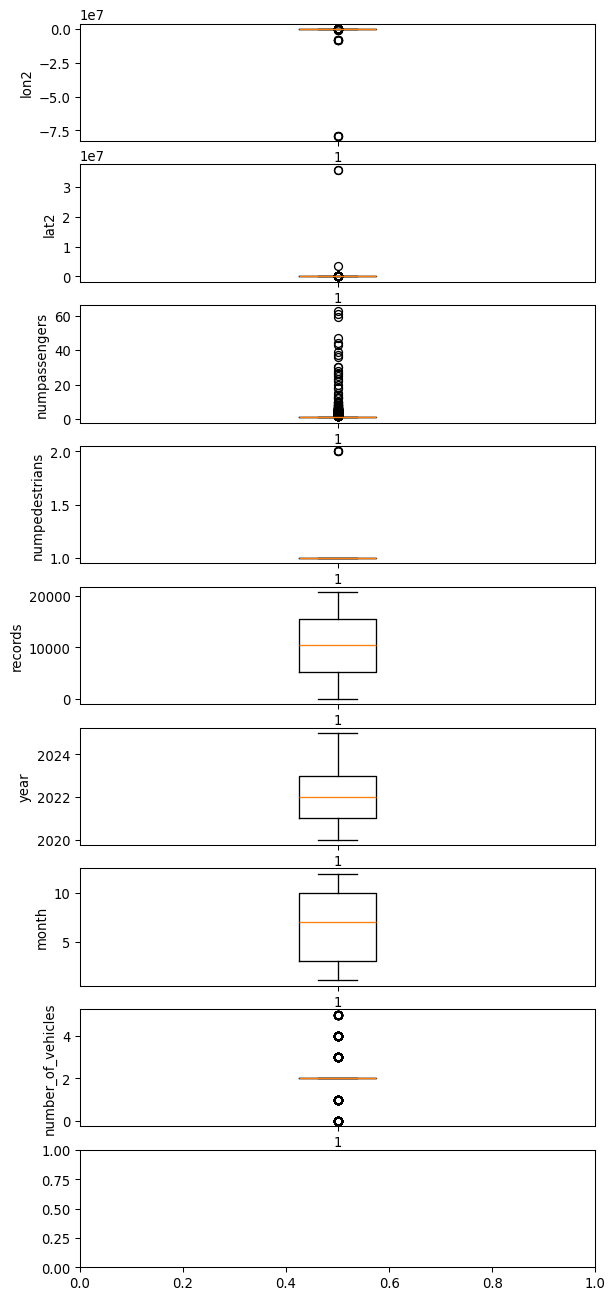

In [83]:
fig, ax = plt.subplots(9,1,dpi=95, figsize=(7,17))
i = 0
for col in crash_df[num_features]:
    ax[i].boxplot(crash_df[num_features][col])
    ax[i].set_ylabel(col)
    i+=1
plt.show()

##### Removing outliers

In [85]:
cols = ['lat2','lon2','numpassengers','number_of_vehicles']
Q1 = crash_df[cols].quantile(0.25)
Q3 = crash_df[cols].quantile(0.75)
IQR = Q3 - Q1

crash_df = crash_df[~((crash_df[cols] < (Q1 - 1.5 * IQR)) |(crash_df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

#### Feature Extraction

In [87]:
def extract_injury_features(df):
    """
    Extracts features that are directly impactful for injury prediction.
    """
    new_df = df.copy()

    # 1️⃣ Road Condition Risk
    if {'rdsurface', 'rdcondition', 'weather', 'lightcond'}.issubset(new_df.columns):
        new_df['bad_road_weather'] = ((new_df['rdsurface'] == 'wet') & 
                                      (new_df['rdcondition'] != 'dry') & 
                                      (new_df['weather'].isin(['rain', 'fog', 'snow']))).astype(int)
        new_df['low_visibility'] = new_df['lightcond'].isin(['dark', 'fog', 'dusk']).astype(int)

    # 2️⃣ Crash Timing Risk
    if 'time_of_day' in new_df.columns:
        new_df['night_crash'] = new_df['time_of_day'].isin(['midnight', '1AM', '2AM', '3AM', '4AM']).astype(int)
        new_df['rush_hour_crash'] = new_df['time_of_day'].isin(['7AM', '8AM', '5PM', '6PM']).astype(int)

    # 3️⃣ Vehicle Risk
    vehicle_types = ['TRACTOR/SEMI-TRAILER', 'TRUCK/TRAILER', 'SINGLE UNIT TRUCK (3 OR MORE AXLES)', 
                     'FARM TRACTOR', 'UNKNOWN HEAVY TRUCK']
    if any(v in new_df.columns for v in vehicle_types):
        new_df['heavy_vehicle_involved'] = new_df[vehicle_types].sum(axis=1) > 0

    emergency_vehicles = ['POLICE', 'FIRETRUCK', 'EMS VEHICLE- AMBULANCE- RESCUE SQUAD']
    if any(v in new_df.columns for v in emergency_vehicles):
        new_df['emergency_vehicle_involved'] = new_df[emergency_vehicles].sum(axis=1) > 0

    # 4️⃣ Passenger & Pedestrian Risk
    if {'numpassengers', 'numpedestrians'}.issubset(new_df.columns):
        new_df['high_passenger_count'] = (new_df['numpassengers'] > 3).astype(int)
        new_df['pedestrian_involved'] = (new_df['numpedestrians'] > 0).astype(int)

    # 5️⃣ Location-Based Risk
    if {'workarea', 'location_crash_count'}.issubset(new_df.columns):
        new_df['work_zone_crash'] = (new_df['workarea'] == 1).astype(int)
        new_df['high_crash_zone'] = (new_df['location_crash_count'] > new_df['location_crash_count'].median()).astype(int)

    return new_df

# Apply feature extraction
crash_df = extract_injury_features(crash_df)

### Visualization

##### Distribution of Features

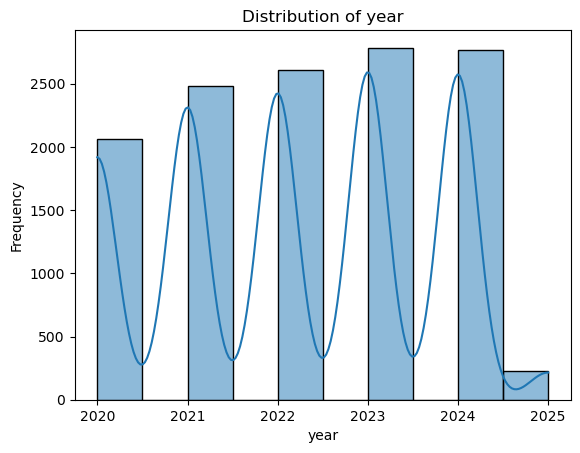

In [90]:
sns.histplot(data=crash_df, x='year', bins=10, kde=True) 
plt.title('Distribution of year')
plt.xlabel('year')
plt.ylabel('Frequency')
plt.show()

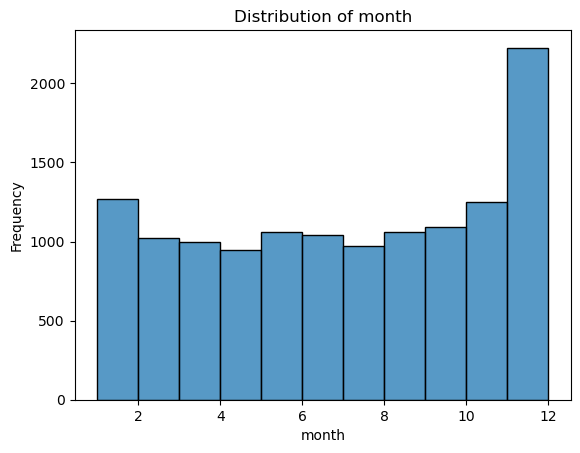

In [91]:
bins=[1,2,3,4,5,6,7,8,9,10,11,12]
sns.histplot(data=crash_df, x='month', bins=bins)
plt.title('Distribution of month')
plt.xlabel('month')
plt.ylabel('Frequency')
plt.show()

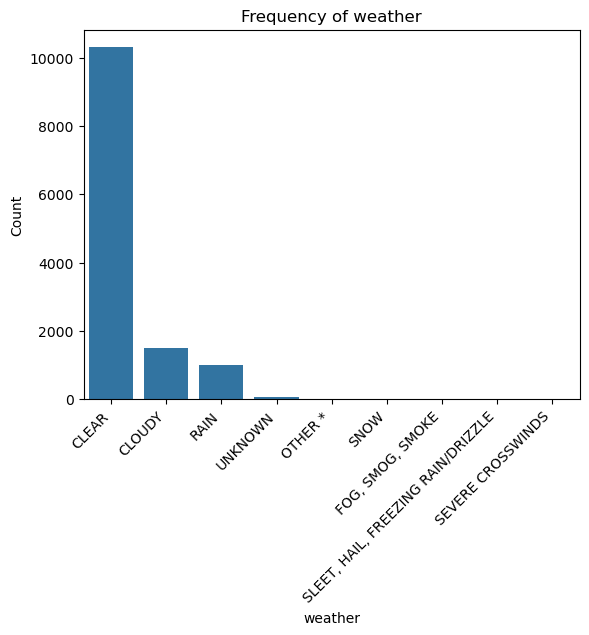

In [92]:
sns.countplot(data=crash_df, x='weather', order=crash_df['weather'].value_counts().index)
plt.title('Frequency of weather')
plt.xlabel('weather')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
plt.show()

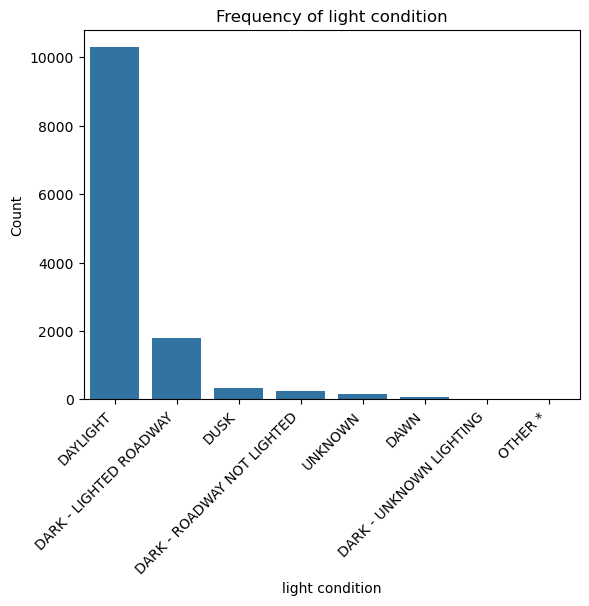

In [93]:
sns.countplot(data=crash_df, x='lightcond', order=crash_df['lightcond'].value_counts().index)
plt.title('Frequency of light condition')
plt.xlabel('light condition')
plt.ylabel('Count')

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
plt.show()

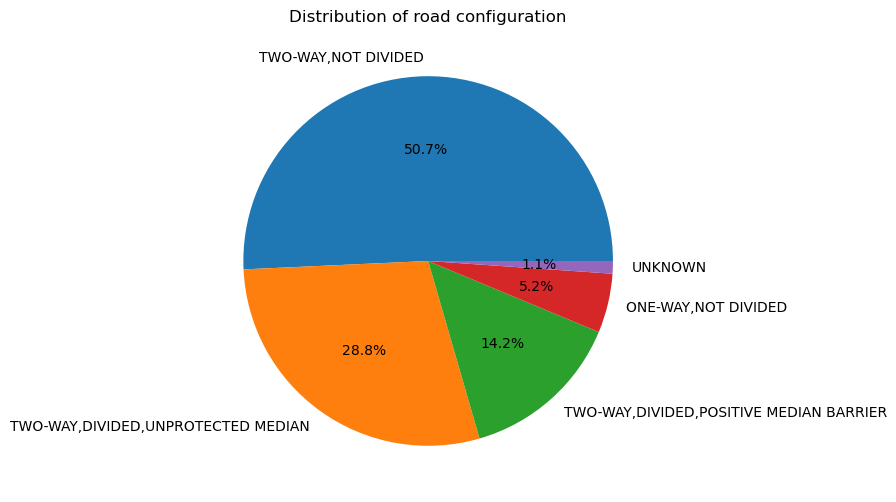

In [94]:
rdconfig_count = crash_df['rdconfigur'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(rdconfig_count, labels=rdconfig_count.index, autopct='%1.1f%%')
plt.title('Distribution of road configuration')
plt.show()

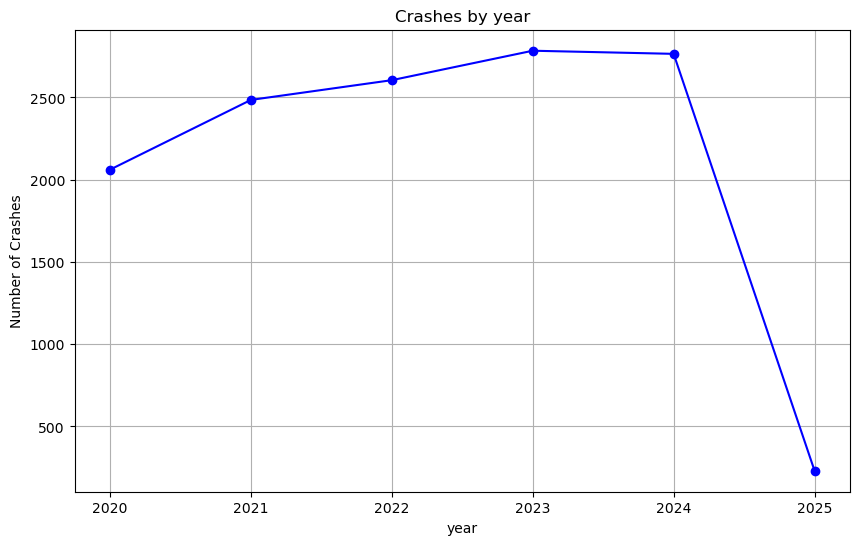

In [95]:
plt.figure(figsize=(10, 6))
crash_df.groupby('year').size().plot(kind='line', marker='o', color='b')
plt.title("Crashes by year")
plt.xlabel("year")
plt.ylabel("Number of Crashes")
plt.grid()
plt.show()

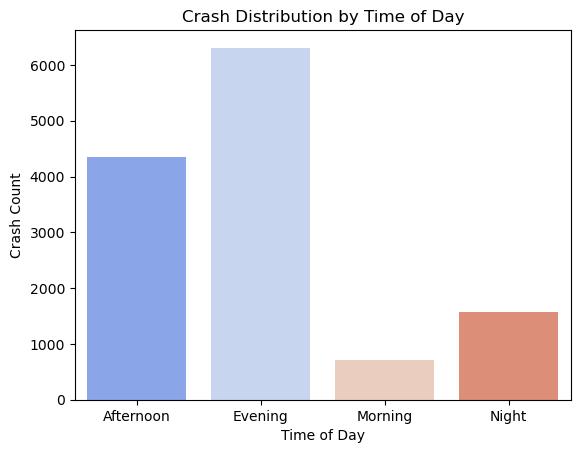

In [96]:
sns.countplot(x=crash_df['time_of_day'], palette='coolwarm')
plt.title("Crash Distribution by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Crash Count")
plt.show()

#### road related features vs injury severity

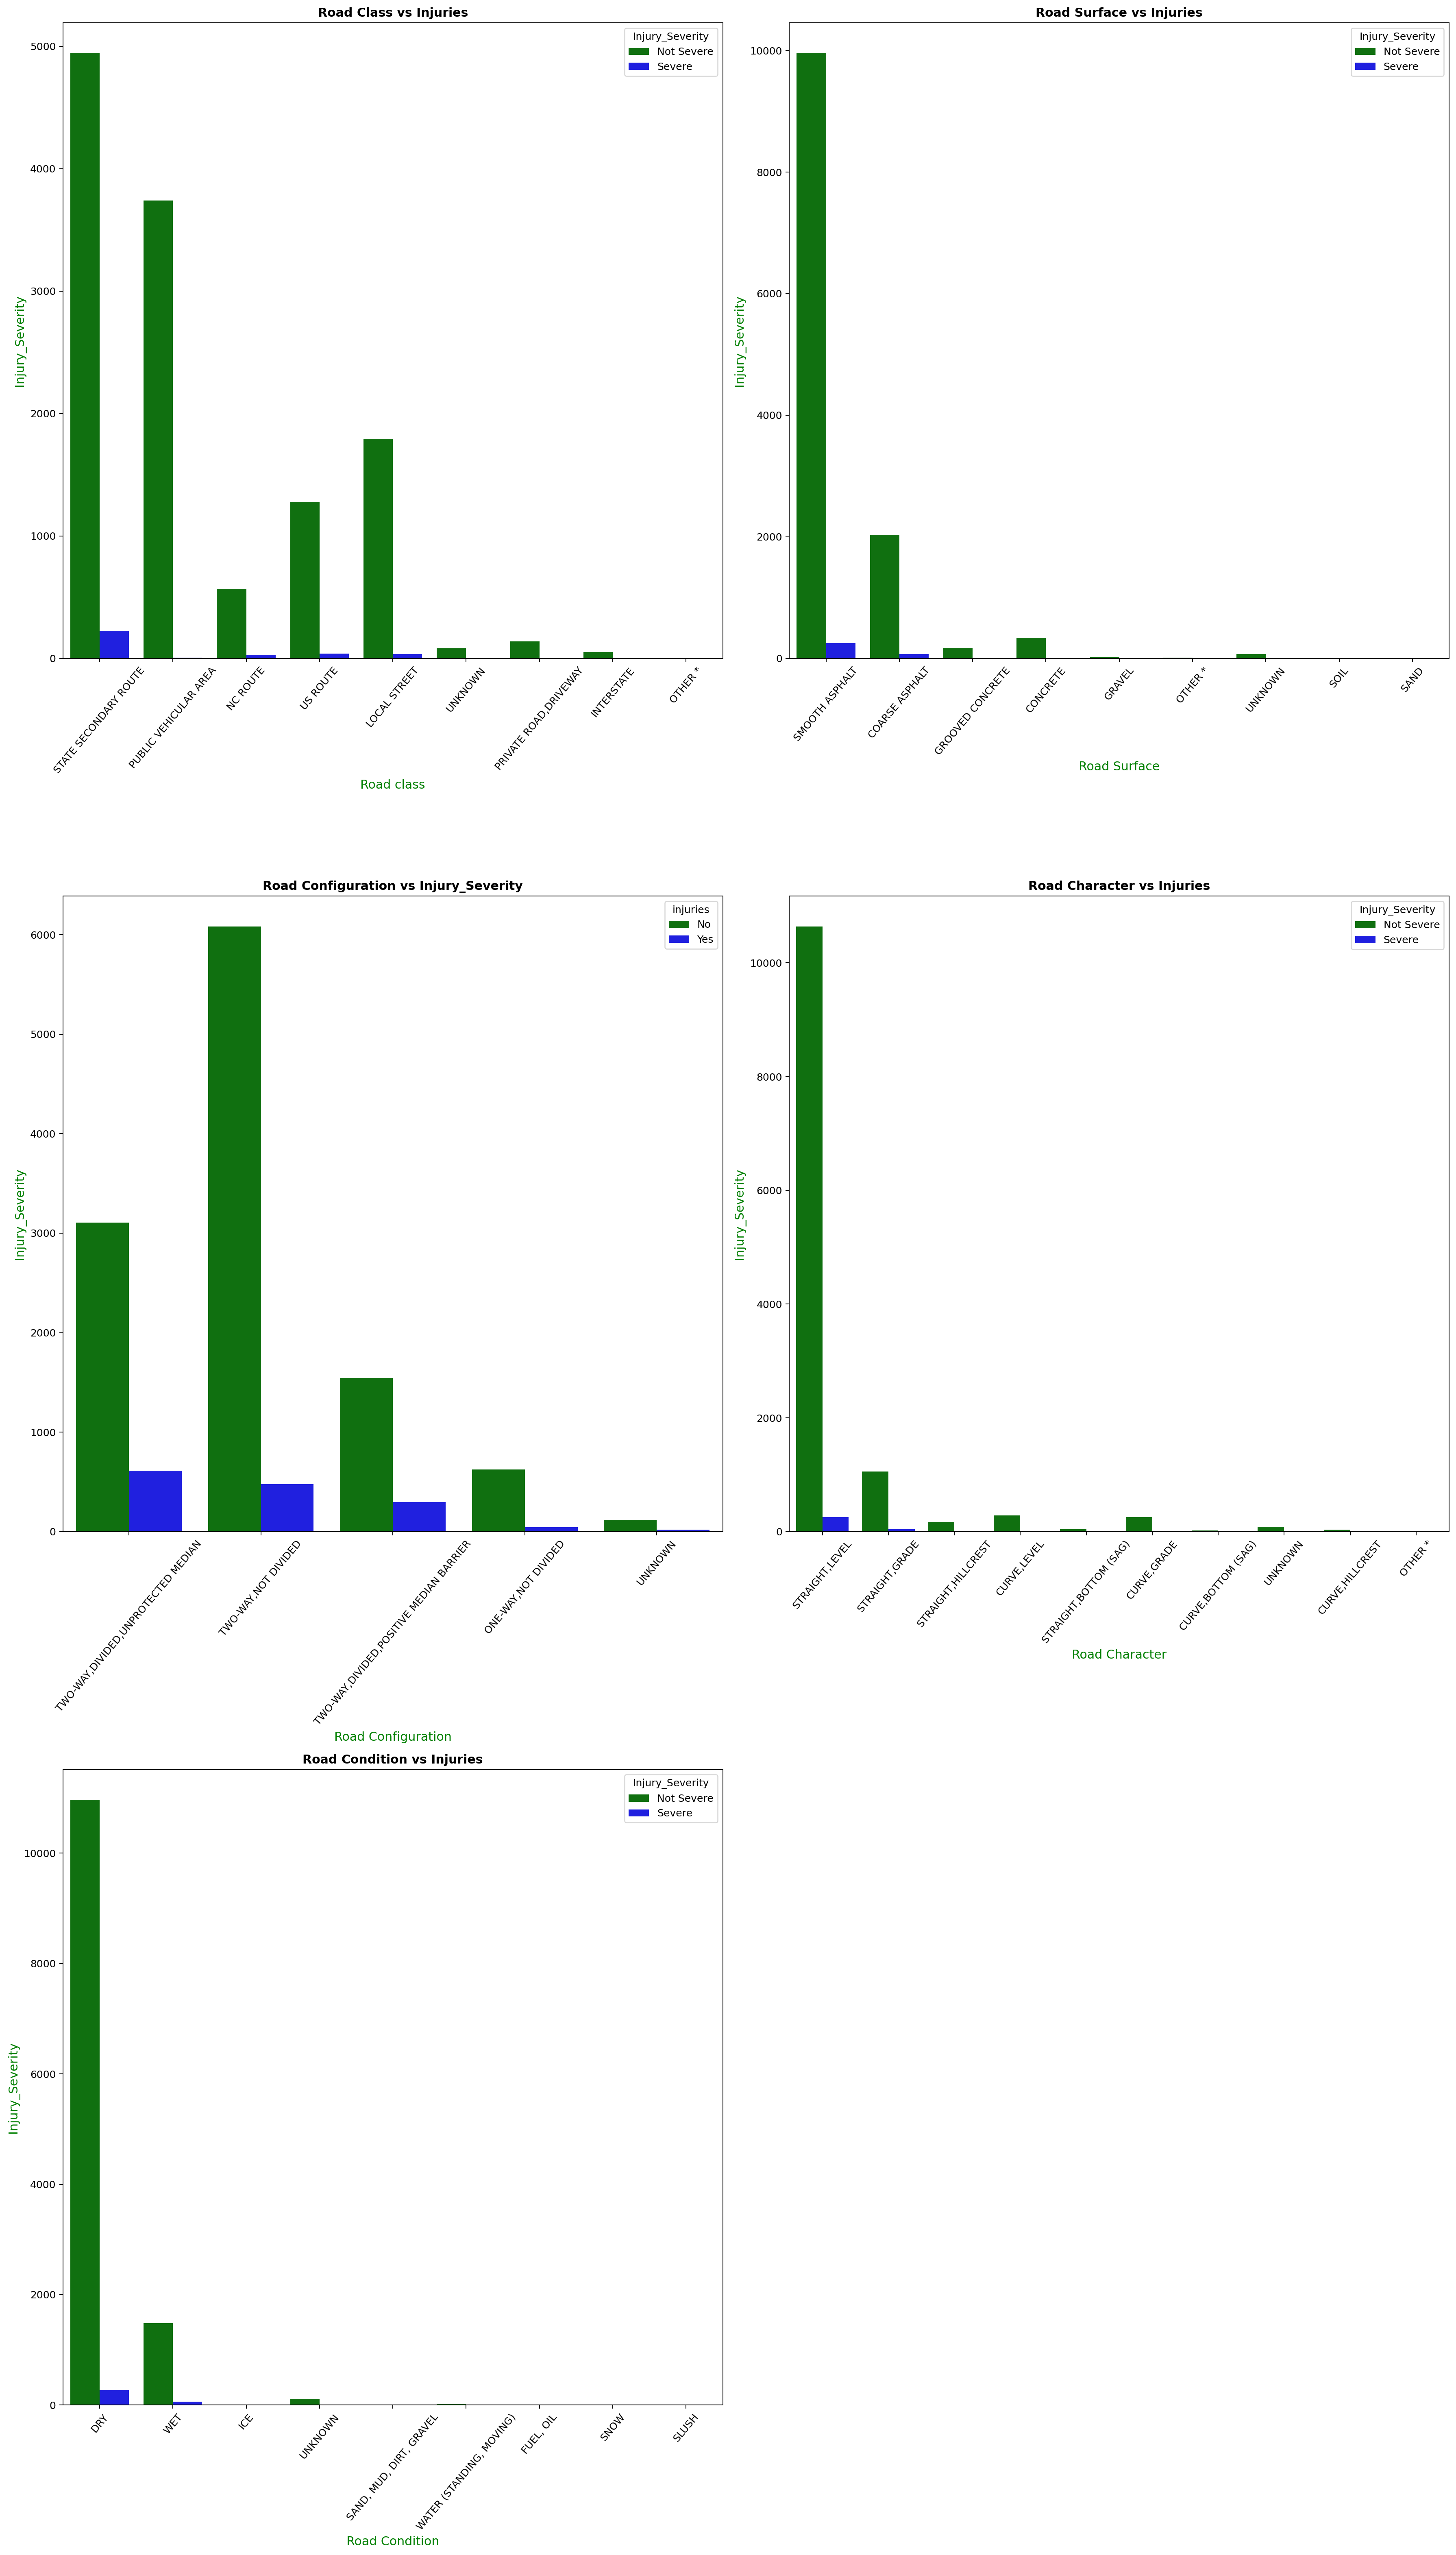

In [98]:
plt.figure(figsize=(20,35), dpi=180)
colors=['green','blue']
plt.subplot(3,2,1)
sns.countplot(x='rdclass',hue='Injury_Severity',data=crash_df, palette=colors)
plt.xticks(rotation=50)
plt.title('Road Class vs Injuries', fontweight='bold')
plt.xlabel('Road class', color='Green',fontsize=12)
plt.ylabel('Injury_Severity', color='Green',fontsize=12)

plt.subplot(3,2,2)
sns.countplot(x='rdsurface',hue='Injury_Severity',data=crash_df, palette=colors)
plt.xticks(rotation=50)
plt.title('Road Surface vs Injuries', fontweight='bold')
plt.xlabel('Road Surface', color='Green',fontsize=12)
plt.ylabel('Injury_Severity', color='Green',fontsize=12)

plt.subplot(3,2,3)
sns.countplot(x='rdconfigur',hue='injuries',data=crash_df, palette=colors)
plt.xticks(rotation=50)
plt.title('Road Configuration vs Injury_Severity', fontweight='bold')
plt.xlabel('Road Configuration', color='Green',fontsize=12)
plt.ylabel('Injury_Severity', color='Green',fontsize=12)


plt.subplot(3,2,4)
sns.countplot(x='rdcharacter',hue='Injury_Severity',data=crash_df, palette=colors)
plt.xticks(rotation=50)
plt.title('Road Character vs Injuries', fontweight='bold')
plt.xlabel('Road Character', color='Green',fontsize=12)
plt.ylabel('Injury_Severity', color='Green',fontsize=12)


plt.subplot(3,2,5)
sns.countplot(x='rdcondition',hue='Injury_Severity',data=crash_df, palette=colors)
plt.xticks(rotation=50)
plt.title('Road Condition vs Injuries', fontweight='bold')
plt.xlabel('Road Condition', color='Green',fontsize=12)
plt.ylabel('Injury_Severity', color='Green',fontsize=12)

plt.tight_layout()
plt.show()


#### weather,light and traffic vs injuries

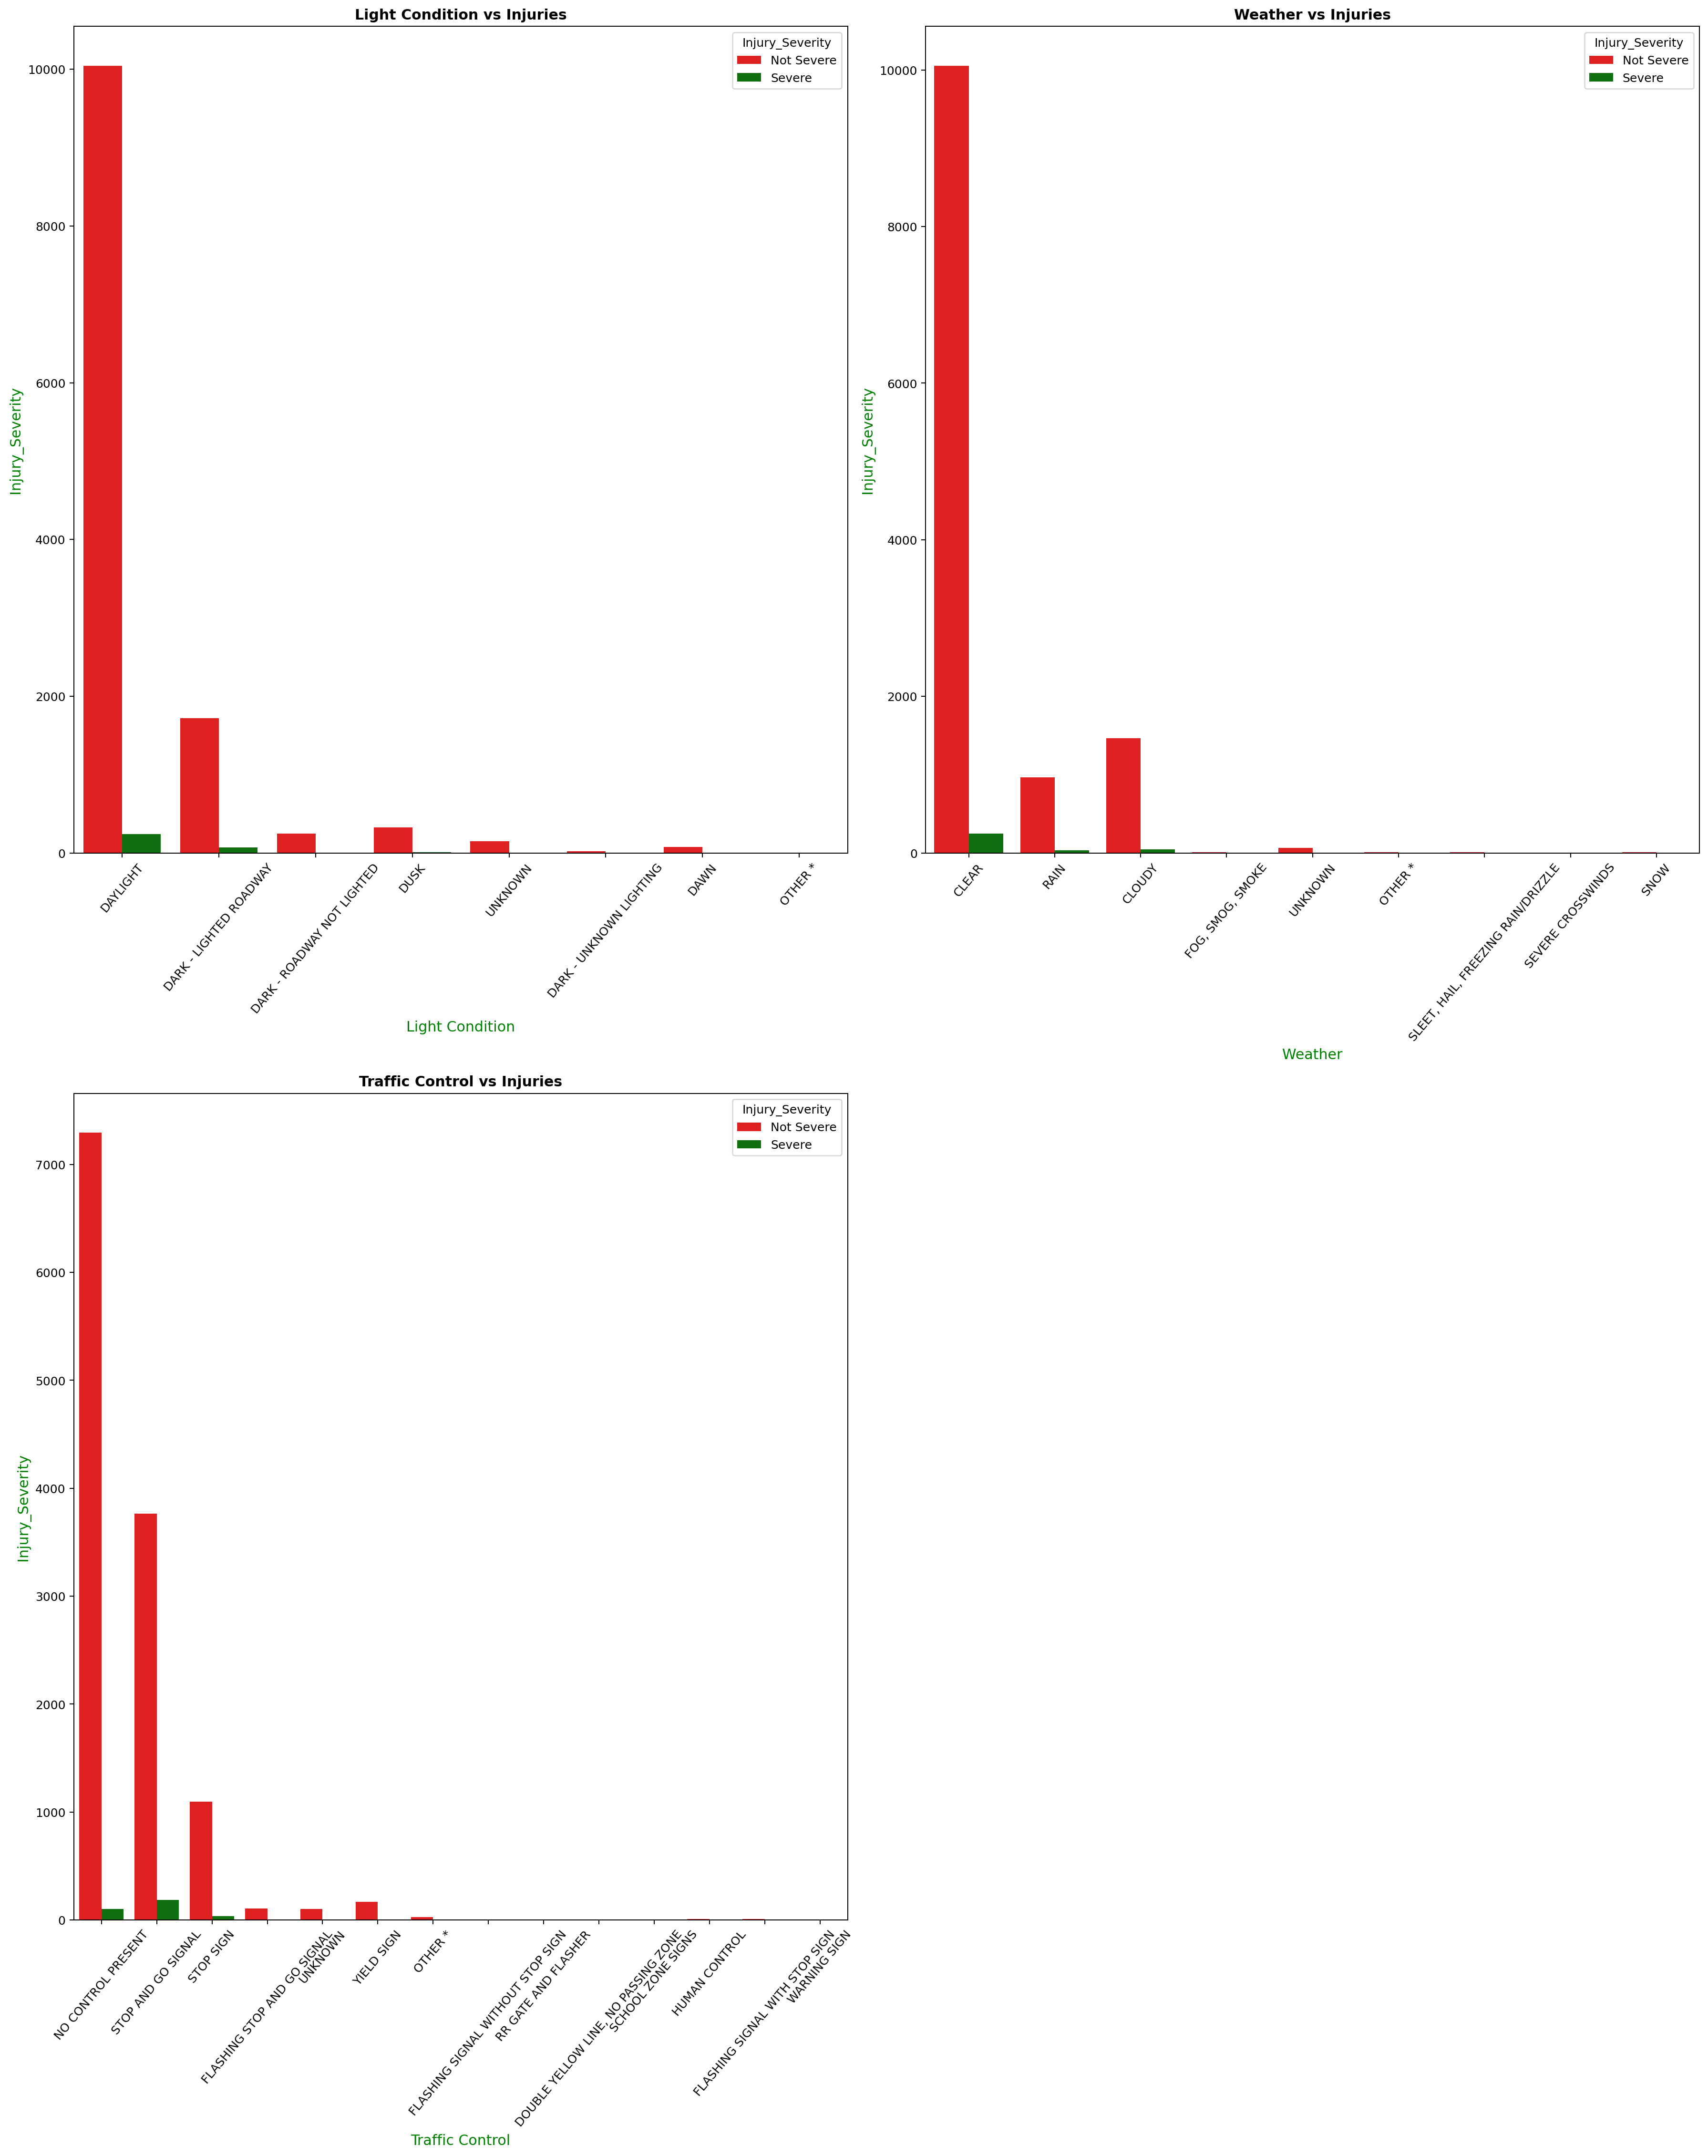

In [100]:
plt.figure(figsize=(20,35), dpi=180)
plt.subplot(3,2,1)
colors = ['red', 'green']
sns.countplot(x='lightcond',hue='Injury_Severity',data=crash_df, palette=colors)
plt.xticks(rotation=50)
plt.title('Light Condition vs Injuries', fontweight='bold')
plt.xlabel('Light Condition', color='Green',fontsize=12)
plt.ylabel('Injury_Severity', color='Green',fontsize=12)


plt.subplot(3,2,2)
sns.countplot(x='weather',hue='Injury_Severity',data=crash_df, palette=colors)
plt.xticks(rotation=50)
plt.title('Weather vs Injuries', fontweight='bold')
plt.xlabel('Weather', color='Green',fontsize=12)
plt.ylabel('Injury_Severity', color='Green',fontsize=12)

plt.subplot(3,2,3)
sns.countplot(x='trafcontrl',hue='Injury_Severity',data=crash_df, palette=colors)
plt.xticks(rotation=50)
plt.title('Traffic Control vs Injuries', fontweight='bold')
plt.xlabel('Traffic Control', color='Green',fontsize=12)
plt.ylabel('Injury_Severity', color='Green',fontsize=12)

plt.tight_layout()
plt.show()

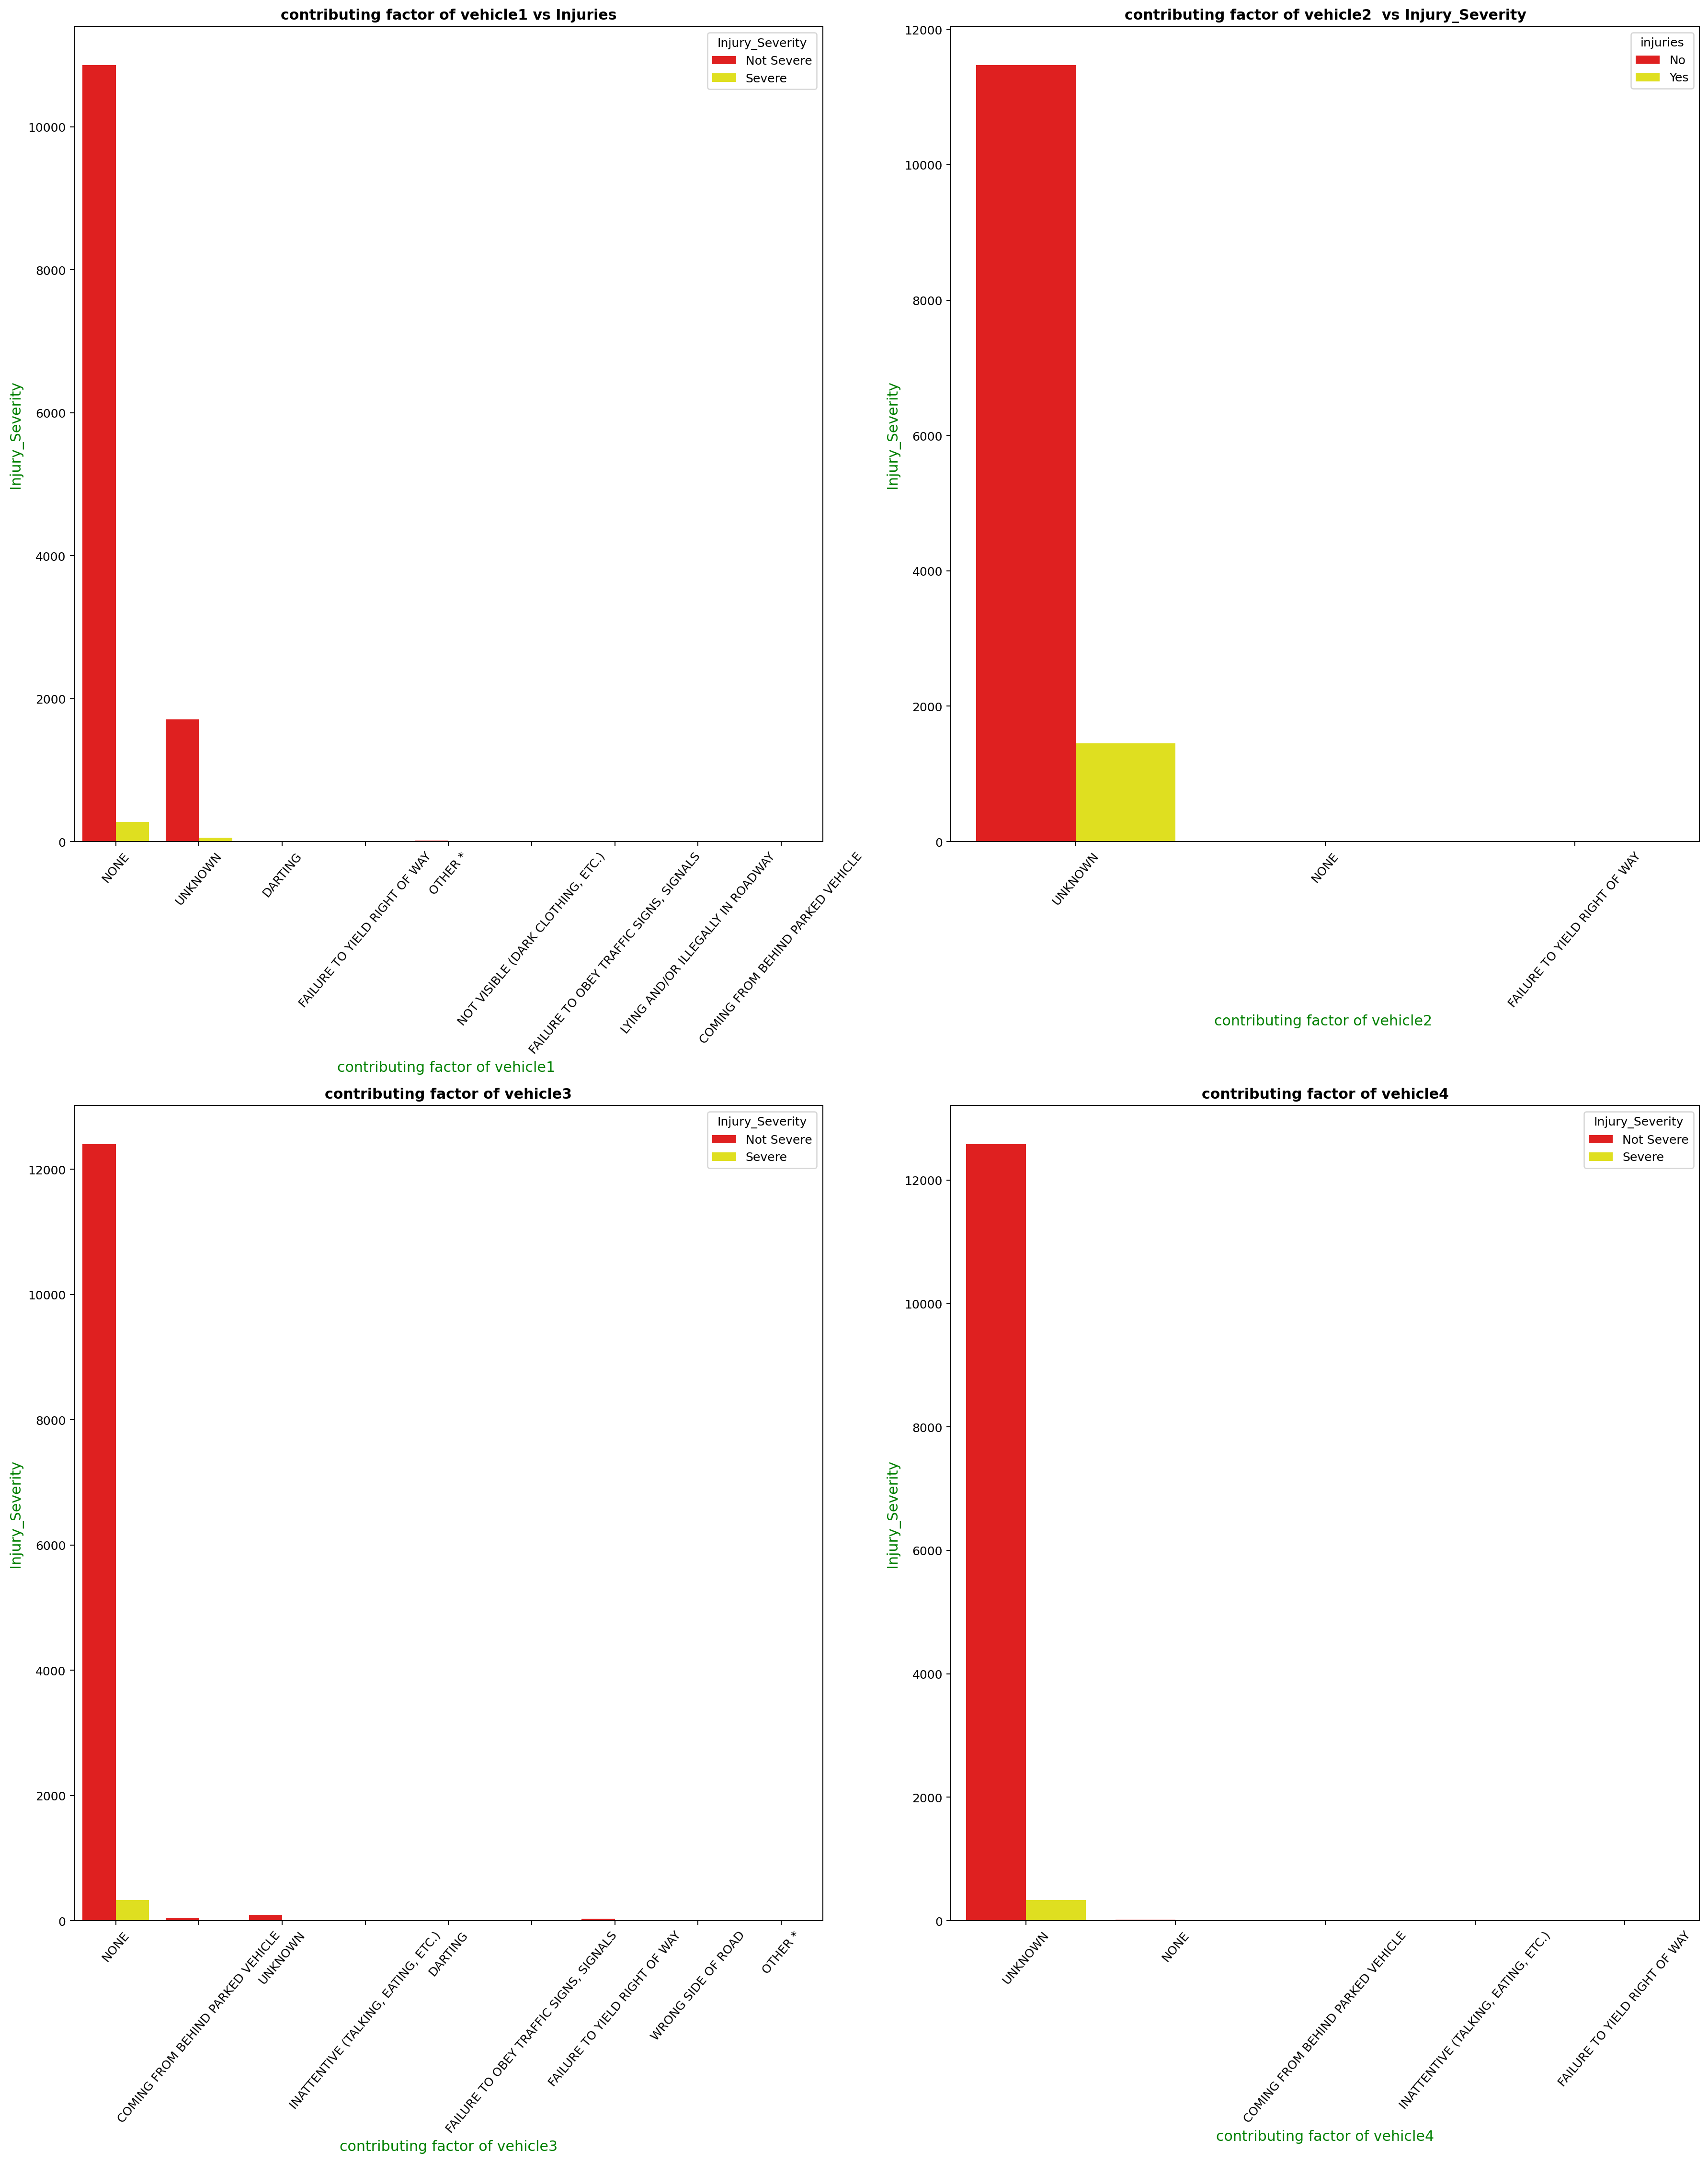

In [101]:
plt.figure(figsize=(20,35), dpi=180)
plt.subplot(3,2,1)
colors = ['red', 'yellow']
sns.countplot(x='contrcir1_desc',hue='Injury_Severity',data=crash_df, palette=colors)
plt.xticks(rotation=50)
plt.title('contributing factor of vehicle1 vs Injuries', fontweight='bold')
plt.xlabel('contributing factor of vehicle1 ', color='Green',fontsize=12)
plt.ylabel('Injury_Severity', color='Green',fontsize=12)


plt.subplot(3,2,2)
sns.countplot(x='contrcir2_desc',hue='injuries',data=crash_df, palette=colors)
plt.xticks(rotation=50)
plt.title('contributing factor of vehicle2  vs Injury_Severity', fontweight='bold')
plt.xlabel('contributing factor of vehicle2 ', color='Green',fontsize=12)
plt.ylabel('Injury_Severity', color='Green',fontsize=12)

plt.subplot(3,2,3)
sns.countplot(x='contrcir3_desc',hue='Injury_Severity',data=crash_df, palette=colors)
plt.xticks(rotation=50)
plt.title('contributing factor of vehicle3', fontweight='bold')
plt.xlabel('contributing factor of vehicle3', color='Green',fontsize=12)
plt.ylabel('Injury_Severity', color='Green',fontsize=12)

plt.subplot(3,2,4)
sns.countplot(x='contrcir4_desc',hue='Injury_Severity',data=crash_df, palette=colors)
plt.xticks(rotation=50)
plt.title('contributing factor of vehicle4', fontweight='bold')
plt.xlabel('contributing factor of vehicle4', color='Green',fontsize=12)
plt.ylabel('Injury_Severity', color='Green',fontsize=12)

plt.tight_layout()
plt.show()

<Axes: xlabel='lat2', ylabel='lon2'>

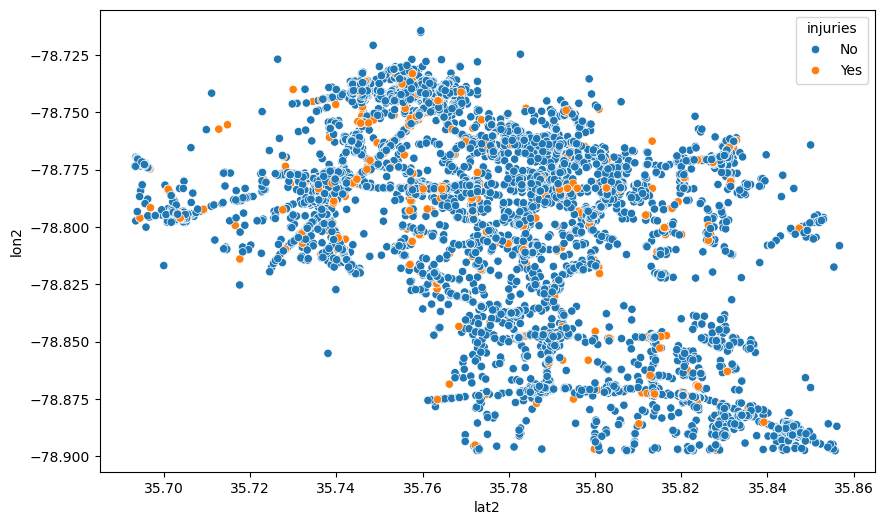

In [102]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=crash_df,x='lat2',y='lon2',hue='injuries')

In [103]:
cols_to_drop=['contrcir1_desc','contrcir2_desc','contrcir3_desc','contrcir4_desc','ta_time','records']
crash_df.drop(cols_to_drop,axis=1,inplace=True)

In [104]:
X = crash_df.drop('Injury_Severity',axis=1)
y = crash_df['Injury_Severity']

In [105]:
y = y.map({"Not Severe":0 , "Severe": 1})

In [106]:
# Separate numerical and categorical columns
num_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_features = X.select_dtypes(include=['object']).columns.tolist()

In [107]:
# Define preprocessors
num_transformer = StandardScaler()  # minmaxscaler for numerical features
cat_transformer = OneHotEncoder(handle_unknown='ignore')  # onehot encoder for categorical features

In [108]:
# Combine preprocessors in a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)
    ],
     remainder='passthrough'
)

#### Splitting and scaling the dataset

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [111]:
X_train_scaled =  preprocessor.fit_transform(X_train)
X_test_scaled =  preprocessor.transform(X_test)

#### Feature Selection 

In [113]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

# Initialize the model
model = LogisticRegression(solver='liblinear', max_iter=1000)

# Fit the model on the scaled training data
model.fit(X_train_scaled, y_train)

# Initialize SelectFromModel with the trained model
selector = SelectFromModel(model, prefit=True)

# Transform the training data to select features
X_train_selected = selector.transform(X_train_scaled)
X_test_selected = selector.transform(X_test_scaled)

In [114]:
y.value_counts()

Injury_Severity
0    12598
1      333
Name: count, dtype: int64

In [115]:
#calculate the percentage of classes
y.value_counts(normalize=True)*100

Injury_Severity
0    97.424793
1     2.575207
Name: proportion, dtype: float64

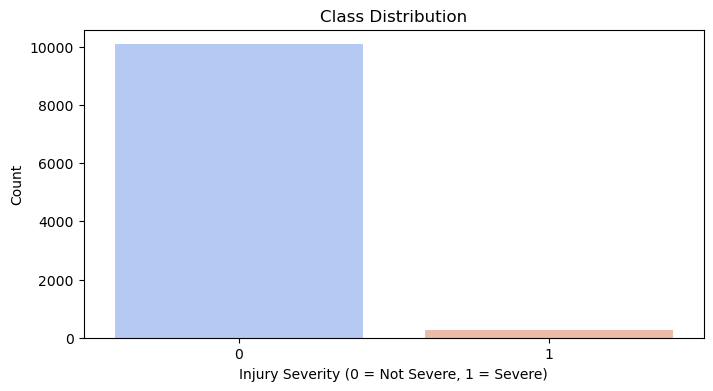

In [116]:
# Check class distribution
plt.figure(figsize=(8, 4))
sns.countplot(x=y_train, palette="coolwarm")
plt.title("Class Distribution")
plt.xlabel("Injury Severity (0 = Not Severe, 1 = Severe)")
plt.ylabel("Count")
plt.show()

From the plot above, we can see we have a very imbalanced class - just 2.57% of our dataset belong to the class (Injury_Severity=1)

This is a problem because many machine learning models are designed to maximize overall accuracy, which especially with imbalanced classes may not be the best metric to use. Classification accuracy is defined as the number of correct predictions divided by total predictions times 100. For example, if we simply predicted all injuries are not severe, we would get a classification acuracy score of over 99%!

Let's see how logistic regression performs on this dataset.

In [119]:
log_reg = LogisticRegression(solver='liblinear').fit(X_train_selected, y_train)
 
# Predict on training set
lr_pred = log_reg.predict(X_test_selected)
# Checking accuracy
accuracy_score(y_test, lr_pred)

0.9737147274835717

#### Change the performance metric

Accuracy is not the best metric to use when evaluating imbalanced datasets as it can be misleading. Metrics that can provide better insight include:

* Confusion Matrix: a table showing correct predictions and incorrect predictions.        
* AUROC Score (Area Under the Receiver Operating Characteristic Curve):  a performance metric for classification models, especially useful for imbalanced datasets. It measures how well a model separates positive and negative classes.    


#### Oversampling Minority Class

Oversampling can be defined as adding more copies of the minority class. Oversampling can be a good choice when you don't have a tons of data to work with.     
**SMOTE (Synthetic Minority Over-sampling Technique)** : oversampling technique that creates synthetic samples for the minority class instead of simply duplicating existing ones.

In [124]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)  # 'auto' balances classes
X_oversampled, y_oversampled = smote.fit_resample(X_train_selected, y_train)

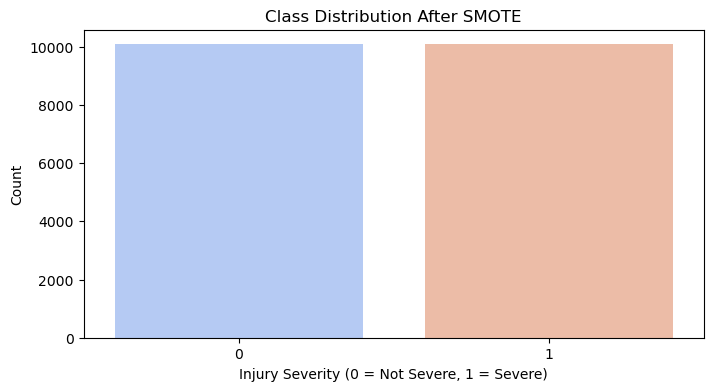

In [125]:
plt.figure(figsize=(8, 4))
sns.countplot(x=y_oversampled, palette="coolwarm")
plt.title("Class Distribution After SMOTE")
plt.xlabel("Injury Severity (0 = Not Severe, 1 = Severe)")
plt.ylabel("Count")
plt.show()

In [126]:
oversampled = LogisticRegression(solver='liblinear').fit(X_oversampled, y_oversampled)

oversampled_pred = oversampled.predict(X_test_selected)

In [127]:
pd.DataFrame(confusion_matrix(y_test, oversampled_pred))

,0,1
0,2402,118
1,17,50


In [128]:
oversampled_pred_prob = oversampled.predict_proba(X_test_selected)[:, 1]
roc_auc_score(y_test,oversampled_pred_prob)

0.9647417673537075

#### Undersampling Majority Class

**RandomUnderSampler** : an undersampling technique that reduces the majority class by randomly removing samples until a desired balance is achieved.

In [132]:
from imblearn.under_sampling import RandomUnderSampler
ru = RandomUnderSampler(sampling_strategy='auto', random_state=42)  # 'auto' balances classes
X_undersampled, y_undersampled = ru.fit_resample(X_train_selected, y_train)

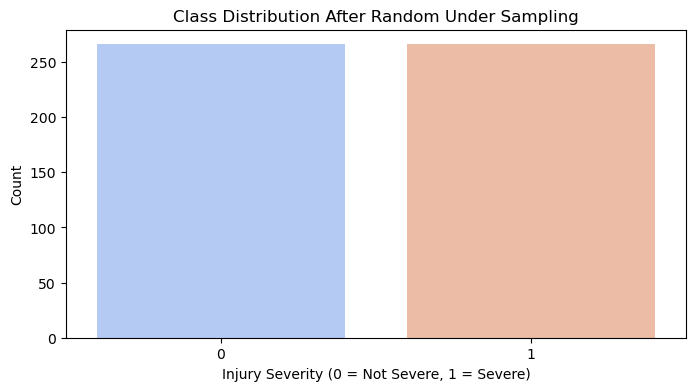

In [134]:
plt.figure(figsize=(8, 4))
sns.countplot(x=y_undersampled, palette="coolwarm")
plt.title("Class Distribution After Random Under Sampling")
plt.xlabel("Injury Severity (0 = Not Severe, 1 = Severe)")
plt.ylabel("Count")
plt.show()

In [135]:
undersampled = LogisticRegression(solver='liblinear').fit(X_undersampled, y_undersampled)

undersampled_pred = undersampled.predict(X_test_selected)

In [138]:
pd.DataFrame(confusion_matrix(y_test, undersampled_pred))

,0,1
0,2288,232
1,0,67


In [140]:
undersampled_pred_prob = undersampled.predict_proba(X_test_selected)[:, 1]
roc_auc_score(y_test,undersampled_pred_prob)

0.9603707652215115

#### combining oversampling and undersampling

**SMOTEENN** : a hybrid resampling technique that combines both oversampling and undersampling:

Oversampling (SMOTE) → Creates synthetic samples for the minority class to balance the dataset.     
Undersampling (Edited Nearest Neighbors - ENN) → Removes noisy or ambiguous samples from the majority class.

In [144]:
smoteenn = SMOTEENN(sampling_strategy=0.4, random_state=42)
X_train_balanced, y_train_balanced = smoteenn.fit_resample(X_train_selected, y_train)

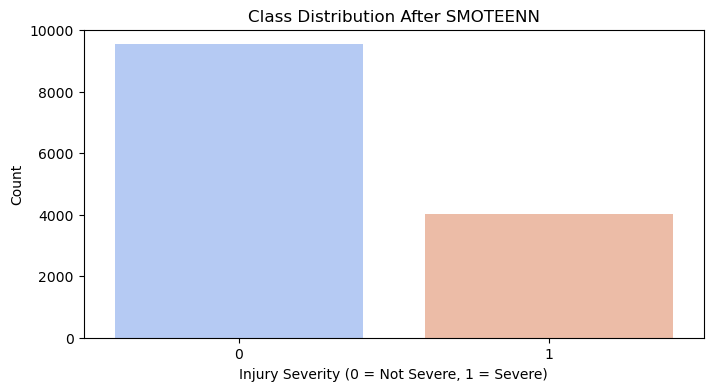

In [145]:
plt.figure(figsize=(8, 4))
sns.countplot(x=y_train_balanced, palette="coolwarm")
plt.title("Class Distribution After SMOTEENN")
plt.xlabel("Injury Severity (0 = Not Severe, 1 = Severe)")
plt.ylabel("Count")
plt.show()

Here we can see a mix of oversampling and undersampling which is good.so we are going to use this for training and evaluating different classification models.

In [147]:
scores={}

#function for model evaluation
def evaluate_model(X_test, y_test, model,model_name):
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for AUC
    auc = roc_auc_score(y_test, y_pred_prob)
    print(f"AUROC: {auc}")
    sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,fmt="d")
    scores[model_name] = auc  

#### Logistic Regression

AUROC: 0.9587953091684435


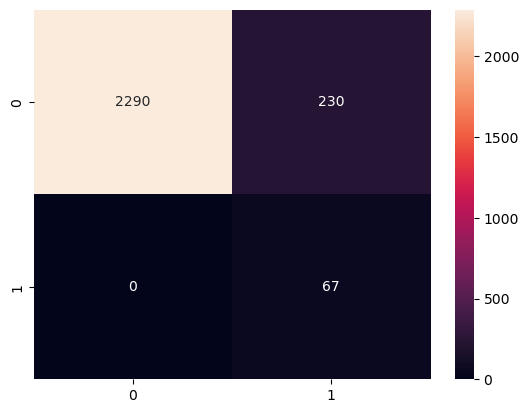

In [149]:
lr = LogisticRegression(random_state=42,C=0.01, solver="lbfgs", max_iter=500)
lr.fit(X_train_balanced,y_train_balanced)
evaluate_model(X_test_selected,y_test,lr,'Logistic Regression')

#### KNN

In [151]:
for i in [1,2,3,4,5,6,7,8,9,10]:
  knn= KNeighborsClassifier(i)
  knn.fit(X_train_balanced, y_train_balanced)
  print("K value :", i, "Cross Val Accuracy :" , np.mean(cross_val_score(knn, X_test_selected, y_test, cv=10)))

K value : 1 Cross Val Accuracy : 0.9644443446769028
K value : 2 Cross Val Accuracy : 0.9741043368950345
K value : 3 Cross Val Accuracy : 0.9717862380653077
K value : 4 Cross Val Accuracy : 0.9741043368950345
K value : 5 Cross Val Accuracy : 0.9733306396097093
K value : 6 Cross Val Accuracy : 0.9741043368950345
K value : 7 Cross Val Accuracy : 0.9741043368950345
K value : 8 Cross Val Accuracy : 0.9741043368950345
K value : 9 Cross Val Accuracy : 0.9741043368950345
K value : 10 Cross Val Accuracy : 0.9741043368950345


AUROC: 0.8618248045486853


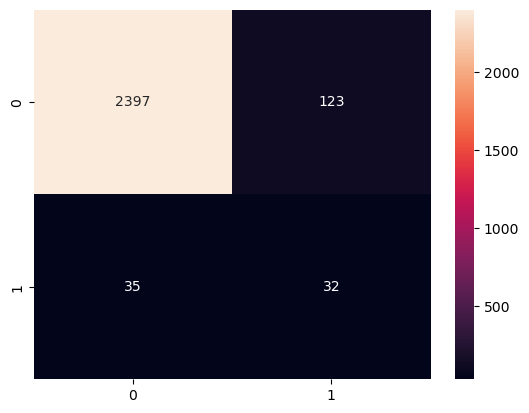

In [152]:
knn= KNeighborsClassifier(6)
knn.fit(X_train_balanced, y_train_balanced)
evaluate_model(X_test_selected,y_test,knn,'KNN')

#### SVC

Best Parameters: {'kernel': 'rbf', 'gamma': 0.1, 'degree': 3, 'C': 10}
Best Score: 0.9999656695777548
AUROC: 0.9564143567874912


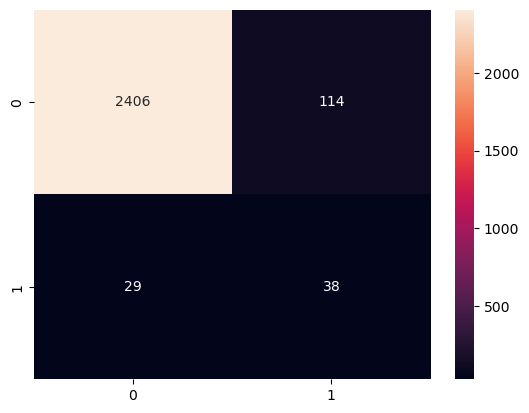

In [154]:
from sklearn.model_selection import RandomizedSearchCV,StratifiedKFold
param_grid = {
    'C': [0.1, 1, 10, 100],  
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'degree': [2, 3, 4]
}
svc = SVC(probability=True)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

random_search = RandomizedSearchCV(svc, param_grid, cv=cv, scoring='roc_auc', n_iter=10, random_state=42, n_jobs=-1)
random_search.fit(X_train_balanced, y_train_balanced)

print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)


evaluate_model(X_test_selected,y_test,random_search,'SVC')

#### Decision tree

Best Parameters: {'splitter': 'best', 'max_depth': 10, 'criterion': 'gini'}
Best Score: 0.9872312311649101
AUROC: 0.9244018005212037


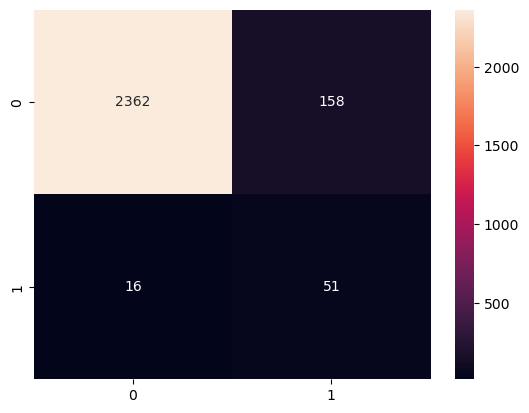

In [156]:
param_grid = {
    'criterion': ["gini", "entropy", "log_loss"],  
    'splitter': ["best", "random"],
    'max_depth': [10,20,30,40,50]
}
dt = DecisionTreeClassifier()
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

random_search = RandomizedSearchCV(dt, param_grid, cv=cv, scoring='roc_auc', n_iter=10, random_state=42, n_jobs=-1)
random_search.fit(X_train_balanced, y_train_balanced)

print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

evaluate_model(X_test_selected,y_test,random_search,'Decision Tree')

#### Random forest

Best Parameters: {'oob_score': False, 'n_estimators': 70, 'max_features': 4, 'bootstrap': False}
Best Score: 0.9999931725496067
AUROC: 0.953195332859512


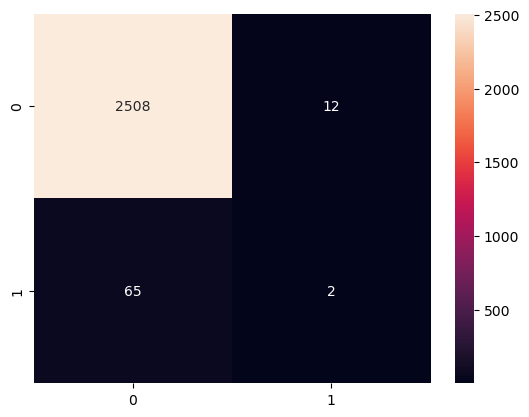

In [158]:
n_estimators = [60, 70, 80,90, 100]
max_features = [2, 3, 4,5,6,7,8,9,10]
bootstrap = [True, False]
oob_score = [True, False]

param_grid = {
    'n_estimators':n_estimators,
    'max_features':max_features,
    'bootstrap':bootstrap,
    'oob_score':oob_score
}
rf = RandomForestClassifier()
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

random_search = RandomizedSearchCV(rf, param_grid, cv=cv, scoring='roc_auc', n_iter=10, random_state=42, n_jobs=-1)
random_search.fit(X_train_balanced, y_train_balanced)

print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

evaluate_model(X_test_selected,y_test,random_search,'Random Forest')

#### GradientBoost

Best Parameters: {'n_estimators': 200, 'learning_rate': 0.2}
Best Score: 0.9975647610530045
AUROC: 0.9587893864013266


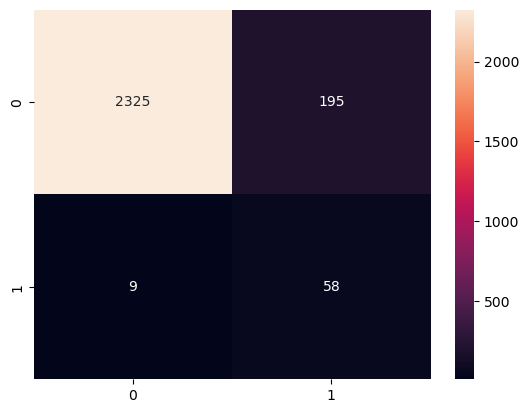

In [160]:
param_grid = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.05, 0.1, 0.2]
}
gb = GradientBoostingClassifier()
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

random_search = RandomizedSearchCV(gb, param_grid, cv=cv, scoring='roc_auc', n_iter=10, random_state=42, n_jobs=-1)
random_search.fit(X_train_balanced, y_train_balanced)

print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

evaluate_model(X_test_selected,y_test,random_search,'GradientBoost')

#### AdaBoost

Best Parameters: {'n_estimators': 200, 'learning_rate': 0.2}
Best Score: 0.994266154442444
AUROC: 0.9592335939350864


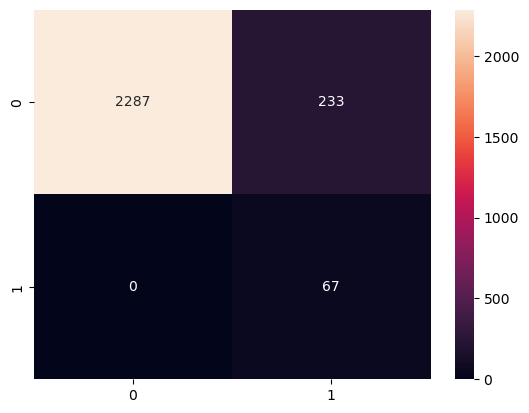

In [162]:
param_grid = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.05, 0.1, 0.2]
}
ad = AdaBoostClassifier()
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

random_search = RandomizedSearchCV(ad, param_grid, cv=cv, scoring='roc_auc', n_iter=10, random_state=42, n_jobs=-1)
random_search.fit(X_train_balanced, y_train_balanced)

print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

evaluate_model(X_test_selected,y_test,random_search,'AdaBoost')

#### XGBoost

Best Parameters: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.13}
Best Score: 0.999442390742243
AUROC: 0.9570362473347548


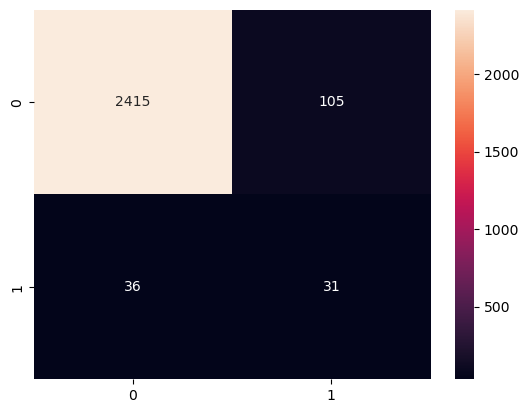

In [164]:
import xgboost as xgb
param_grid = {
    'learning_rate': [0.01,0.02,0.03,0.04,0.05,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1], 
     "n_estimators": [100, 300, 500],
     "max_depth": [3, 5, 7],
     "subsample": [0.8, 1.0]
}
xg = xgb.XGBClassifier()
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

random_search = RandomizedSearchCV(xg, param_grid, cv=cv, scoring='roc_auc', n_iter=10, random_state=42, n_jobs=-1)
random_search.fit(X_train_balanced, y_train_balanced)

print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

evaluate_model(X_test_selected,y_test,random_search,'XGBoost')

In [165]:
scores_df = pd.DataFrame(list(scores.items()), columns=["Model", "AUROC"]).sort_values(by="AUROC", ascending=False)
display(scores_df.style.hide(axis="index")) 

Model,AUROC
AdaBoost,0.959234
Logistic Regression,0.958795
GradientBoost,0.958789
XGBoost,0.957036
SVC,0.956414
Random Forest,0.953195
Decision Tree,0.924402
KNN,0.861825


AdaBoost performs well with this dataset

#### conclusion

most of the road related feature affect the severity of crash injury(rdcharacter,rdsurface,rdconfigur)     
most of the crash occured due to no traffic control present          
weather and light condition can affect crash and its severity